In [1]:
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1

In [2]:
batch_size = 256
num_classes = 10
epochs = 10
data_augmentation = True
# num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(filters = 96, kernel_size = (11, 11), strides = (4, 4), padding = 'valid', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same"))

model.add(Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same"))

model.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = "same"))
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 96)          34944     
_________________________________________________________________
activation (Activation)      (None, 6, 6, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 256)         614656    
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv

In [6]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8)

In [7]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
# if not data_augmentation:
#     print('Not using data augmentation.')
#     model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=epochs,
#               validation_data=(x_test, y_test),
#               shuffle=True)
# else:
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for feature-wise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     hist = model.fit_generator(datagen.flow(x_train, y_train,
#                                      batch_size=batch_size),
#                         epochs=epochs,
#                         validation_data=(x_test, y_test),
#                         workers=0)

In [11]:
model.load_weights('saved_models/keras_cifar10_trained_model.h5')
# Score trained model.
train_scores = model.evaluate(x_train, y_train, verbose=1)
print('Test loss:', train_scores[0])
print('Test accuracy:', train_scores[1])

test_scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

50000/50000 [==============================] - 8s 162us/sample - loss: 0.0707 - acc: 0.9761
Test loss: 0.07067751465693116
Test accuracy: 0.97606
10000/10000 [==============================] - 1s 135us/sample - loss: 1.2964 - acc: 0.7178
Test loss: 1.2963615785598754
Test accuracy: 0.7178


In [12]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Flatten())
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       73856     
__________

In [13]:
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a    
    return y

In [15]:
# Generate soft targets
import numpy as np
from tensorflow.keras.layers import Activation, Lambda, concatenate
from tensorflow.keras.models import Model
temperature = 1.0
student_model1 = model
soft_model = Model(inputs = student_model1.layers[0].input, outputs = student_model1.layers[-2].output)
logits = soft_model.predict(x_train)
logits_T = logits / temperature
y_train_soft = np.array([softmax(logit) for logit in logits_T])

In [71]:
from keras.losses import categorical_crossentropy
from keras import backend as K
# def knowledge_distillation_loss(hard_target, soft_target, y_pred, lambda_value):
#     Loss_teacher = categorical_crossentropy(hard_target, y_pred)
#     Loss_student = categorical_crossentropy(soft_target, y_pred)
#     return lambda_value * Loss_teacher + (1-lambda_value) * Loss_student
def knowledge_distillation_loss(y_true, y_pred, lambda_const):
    y_true, logits = y_true[:, :num_classes], y_true[:, num_classes:]
    y_soft = K.softmax(logits / temperature)
    y_pred, y_pred_soft = y_pred[:, :num_classes], y_pred[:, num_classes:]
    return lambda_const * categorical_crossentropy(y_true, y_pred) + (1-lambda_const) * categorical_crossentropy(y_soft, y_pred_soft)

In [72]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape = x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid"))

model2.add(Flatten())
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 128)       73856     
__________

In [73]:
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-8)
model2.compile(loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, lambda_const = 0.1),
              optimizer=opt, 
              metrics=['accuracy'])

In [74]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).

In [75]:
datagen.fit(x_train)

In [76]:
#     Fit the model on the batches generated by datagen.flow().
hist2 = model2.fit_generator(datagen.flow(x_train, y_train,
                                        batch_size=256),
                           epochs=5,
                           validation_data=(x_test, y_test),
                           workers=0)

Epoch 1/5
196/196 [==============================] - 30s 152ms/step - loss: 0.1695 - acc: 0.3915 - val_loss: 0.1401 - val_acc: 0.5067
Epoch 2/5
196/196 [==============================] - 29s 147ms/step - loss: 0.1388 - acc: 0.5076 - val_loss: 0.1285 - val_acc: 0.5411
Epoch 3/5
196/196 [==============================] - 30s 151ms/step - loss: 0.1287 - acc: 0.5488 - val_loss: 0.1204 - val_acc: 0.5783
Epoch 4/5
196/196 [==============================] - 29s 148ms/step - loss: 0.1218 - acc: 0.5737 - val_loss: 0.1107 - val_acc: 0.6099
Epoch 5/5
196/196 [==============================] - 29s 149ms/step - loss: 0.1167 - acc: 0.5902 - val_loss: 0.1118 - val_acc: 0.6116


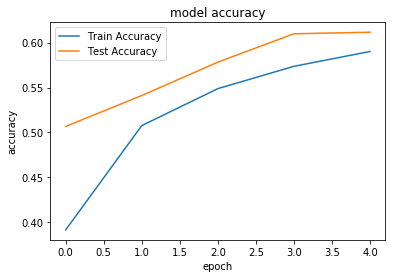

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()


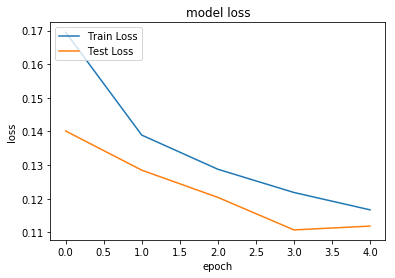

In [78]:
## summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [ ]:
# Score trained model.
train_scores = model.evaluate(x_train, y_train, verbose=1)
print('Test loss:', train_scores[0])
print('Test accuracy:', train_scores[1])

test_scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

In [79]:
temperature = 5.0
logits_T = logits / temperature
y_train_soft = np.array([softmax(logit) for logit in logits_T])
hist3 = model2.fit_generator(datagen.flow(x_train, y_train,
                                          batch_size=256),
                           epochs=5,
                           validation_data=(x_test, y_test),
                           workers=0)

Epoch 1/5
196/196 [==============================] - 29s 148ms/step - loss: 0.1116 - acc: 0.6117 - val_loss: 0.1076 - val_acc: 0.6236
Epoch 2/5
196/196 [==============================] - 29s 148ms/step - loss: 0.1081 - acc: 0.6236 - val_loss: 0.0989 - val_acc: 0.6589
Epoch 3/5
 24/196 [==>...........................] - ETA: 24s - loss: 0.1024 - acc: 0.6414

KeyboardInterrupt: 